[View in Colaboratory](https://colab.research.google.com/github/reecemcw/kerasClothingClassification/blob/master/Clothing_prediction_Keras_Tensorflow.ipynb)

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__) = 1.10.1





1.10.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Load data from Keras.

Data is 4 NumPy arrays
train_images
train_labels
test_images
test_labels

images = 28x28px with pixels ranging 0-255
labels = integers ranging 0-9

labels 0-9 map to class of clothing represented

0 - T-shirt
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandal
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle Boot


Let's Explore The Data

In [9]:
train_images.shape

(60000, 28, 28)

There are 60,000 labels in the dataset

In [10]:
len(train_labels) 

60000

In [11]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape


(10000, 28, 28)

In [13]:
len(test_images)

10000

In [14]:
test_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

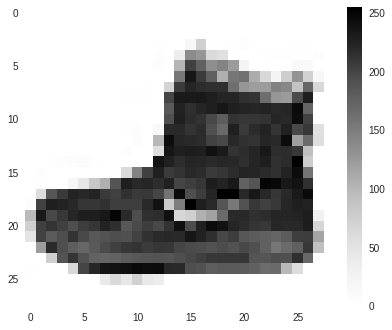

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
0-255 is difficult to work with. N

0-255 (int) is difficult to work with. Lets normalise to within 0 and 1(fl)

In [0]:
train_images = train_images/255
test_images = test_images/255

Verify that data is still good. Print 1-25 images

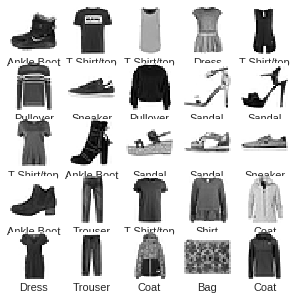

In [22]:
import  matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  
  
  

In [0]:
Train the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Flatten = Takes the (2D) 28x28 and makes a (1D) 1x784

Dense = 


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.4991 - acc: 0.8252
Epoch 2/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3769 - acc: 0.8620
Epoch 3/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3370 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3147 - acc: 0.8847
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2967 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2808 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2721 - acc: 0.8992
Epoch 8/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2581 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2483 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2412 - acc: 0.9103

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('TestAccuracy: ', test_acc)

10000/10000 [==============================] - 0s 35us/step
TestAccuracy:  0.8826


Make predictions!


In [0]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([6.0899055e-07, 9.2946117e-10, 1.1361360e-08, 3.9451084e-10,
       1.2502606e-07, 4.6919463e-03, 1.3012356e-06, 8.4937386e-02,
       1.3873977e-06, 9.1036725e-01], dtype=float32)

Prediction returns a 0-9 array of probabilities, with each position correlating to the clothing index. 

In [37]:
np.argmax(predictions[0])

9

Model is most confident that test_image[0] = class_name[9], or 'Ankle boot'

Let's test

In [38]:
test_labels[0]

9

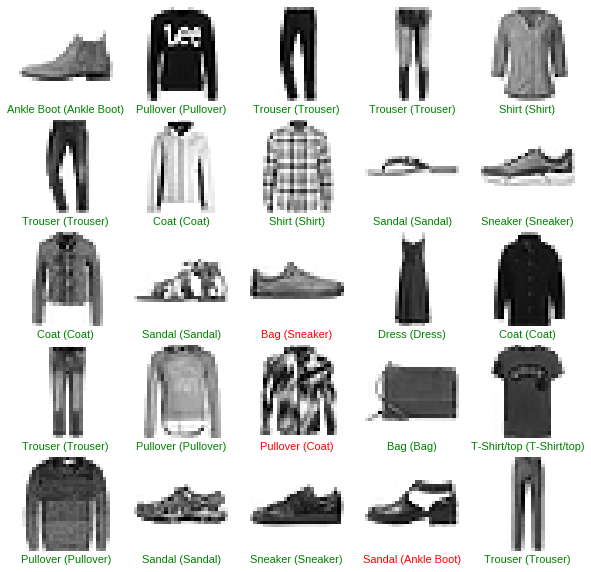

In [43]:
plt.figure(figsize=[10,10])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

In [44]:
img = test_images[0]
print(img.shape)


(28, 28)


Keras models are otimised to make batch predictions, rather than single, so we need to expand the 28x28

In [45]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [46]:
predictions = model.predict(img)
print(predictions)

[[6.0899055e-07 9.2946117e-10 1.1361274e-08 3.9450784e-10 1.2502606e-07
  4.6919375e-03 1.3012368e-06 8.4937334e-02 1.3874002e-06 9.1036725e-01]]


In [47]:
prediction = predictions[0]
np.argmax(prediction)

9